In [1]:
import xarray as xr
import pandas as pd
horizontal_ranges = {
    "rlons": slice(-28.21, 17.99),
    "rlats": slice(-23.21, 21.67)
}

In [ ]:
# aggregate to monthly values,
# use same lat lon coordinates
# ?? include near surface winds even though they break the logic 
# (10M instead of pressure or model levels)

In [2]:
data_dir = "../data/"
target_dir = "../data/monthly/"

In [6]:
for experiment in ["FOREST", "GRASS"]:
    for institution in ["GERICS", "ETH", "IDL", "OUR"]:
        print(institution)
        ds = xr.open_mfdataset(data_dir + institution + "/" + experiment + "/S/*.nc") 
        if institution == "GERICS":
            # time index needs modification to be understood by xarray
            ds["time"] = pd.date_range(start="19860101.", periods=ds.time.size, freq="6h")
        # Resample to monthly values
        ds = ds.resample(time="1MS").mean(dim="time").compute()
        # use same lat-lon coordinates
        ds = ds.sel({"rlat": horizontal_ranges["rlats"], "rlon": horizontal_ranges["rlons"]})
        ds.to_netcdf(target_dir + experiment + "/S_" + institution + ".nc")

GERICS
ETH
IDL
OUR


In [4]:
for experiment in ["FOREST", "GRASS"]:
    print(experiment)
    # repeat for S_10 ETH
    ds = xr.open_mfdataset(data_dir + "ETH/" + experiment + "/S_10M/*.nc")
    # Resample to monthly values
    ds = ds.resample(time="1MS").mean(dim="time").compute()
    # use same lat-lon coordinates
    ds = ds.sel({"rlat": horizontal_ranges["rlats"], "rlon": horizontal_ranges["rlons"]})
    ds.to_netcdf(target_dir + experiment + "/S10M_ETH.nc")

FOREST
GRASS


### Test inclusion of BCCR

In [4]:
for experiment in ["FOREST", "GRASS"]:
    institution = "BCCR"
    print(institution)
    ds = xr.open_mfdataset(data_dir + institution + "/" + experiment + "/S/*.nc")
    if institution == "GERICS":
        # time index needs modification to be understood by xarray
        ds["time"] = pd.date_range(start="19860101.", periods=ds.time.size, freq="6h")
    # Resample to monthly values
    ds = ds.resample(time="1MS").mean(dim="time").compute()
    # use same lat-lon coordinates
    ds = ds.sel({"rlat": horizontal_ranges["rlats"], "rlon": horizontal_ranges["rlons"]})
    ds.to_netcdf(target_dir + experiment + "/S_" + institution + ".nc")

BCCR
BCCR


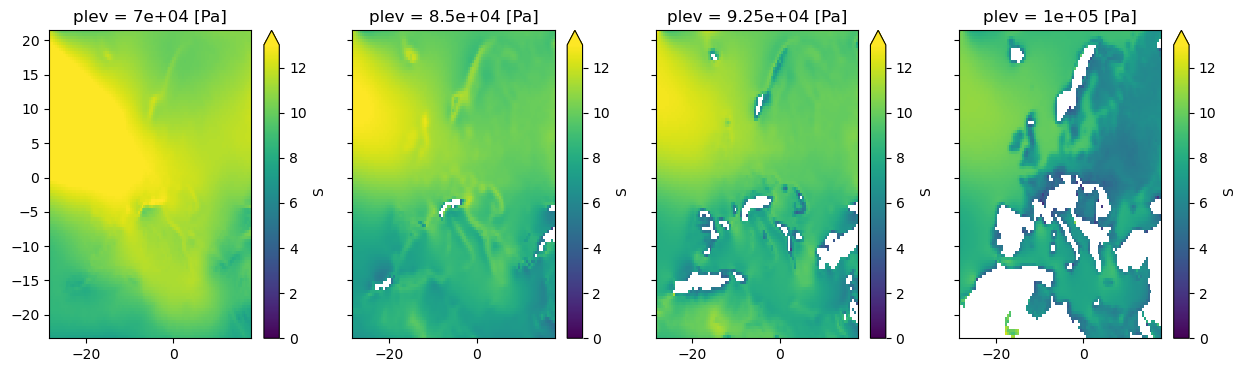

In [16]:
import matplotlib.pyplot as plt
f, axs = plt.subplots(ncols=4, figsize=(15,4), sharey=True)
for i, plev in enumerate(ds.plev):
    ds_tmp = ds.S.sel({"plev":plev}).mean(dim="time")
    ds_tmp.plot(ax=axs[i], vmin=0, vmax=13, extend="max")
    axs[i].set(xlabel="", ylabel="")

**10m winds**